<a href="https://colab.research.google.com/github/sleeptiger/STJ2/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
#위에 있는 두줄은 강사가 항상 사용하는 방법입니다. matplotlib의 기본 scheme 말고 seaborn scheme 을 세팅하고
#일일이 graph 의 font size를 지정하지 필요 없이 seaborn의 font_scale을 사용하면 편합니다.
import missingno as msno

#ignore warrings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 nul data가 존재합니다
이를 확인하고, 향후 수정합니다.

2. 탑색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 의간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight(통찰력)를 얻습니다.

3. feature engineerning - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍드스 데이터 처리 등을 말합니다.

4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수 많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.

5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 
풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.


# 1. Dataset 확인
1. 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
2. 우리는 pandas를 사용하여 데이터셋의 간단한 통께적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
3. 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
4. 캐글에서 데이터세은 보통 train, testset 으로 나눠어 있습니다.


In [46]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [47]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 
예측하려는 target label은 Survived이다.


pandas dataframe 에는 describe() 메소드가 있는 데, 이를 사용하면 각 feature 가 가진 통계치들을 반환해줍니다.

In [48]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


테이블을 살펴보면 passenserID숫자와 다른것이 존재 
그러므로 null data가 존재한다고 볼수있습니다.

이를 좀더 보기 편하게 그래프로 시각화해서 살펴봅시다.

# Null 데이터 check

In [50]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [51]:
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


Train, Test set 에서 Age(둘다 20%), Cabin (둘다 약 80%), Embarked(Train만 0.22%)의 Null data 존재한다는 것을 볼 수 있습니다.


MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

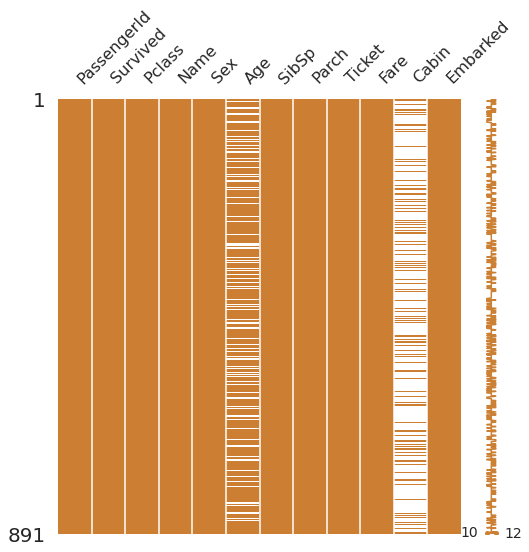

In [52]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

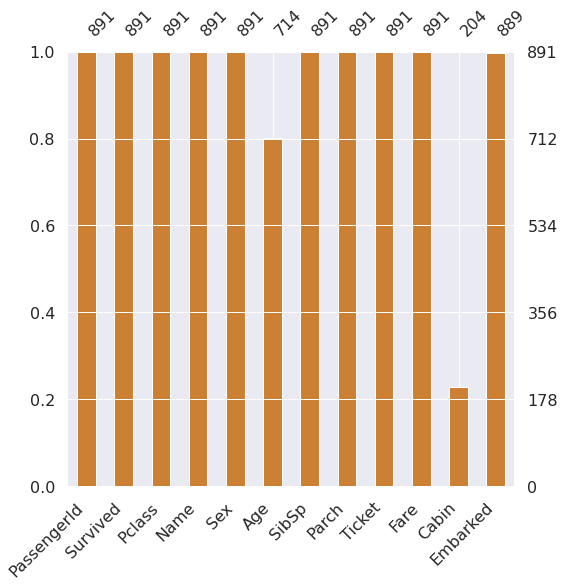

In [53]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

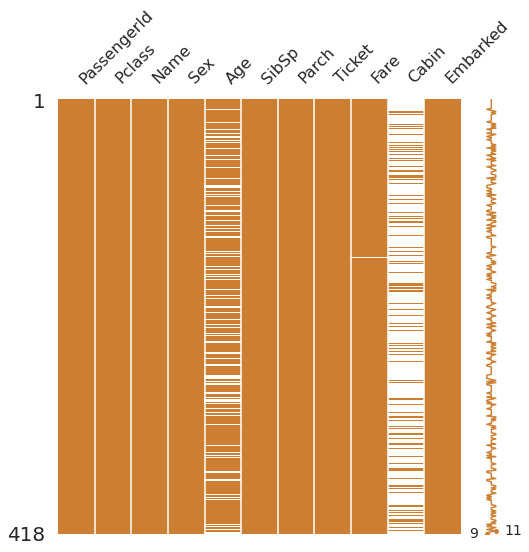

In [54]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

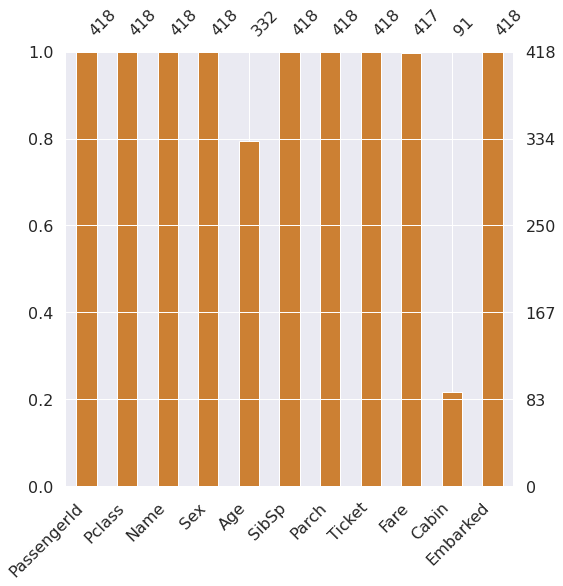

In [55]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

# Target label 확인
1. target label 이 어떤 distribution(분포)을 가지고 있는 지 확인해봐야 합니다.
2. 지금 같은 binary classification 문제의 경우에서, 1과 0 의 분포가 어떠냐에 따라 모델의 평가
방법이 달라 질 수 있습니다.

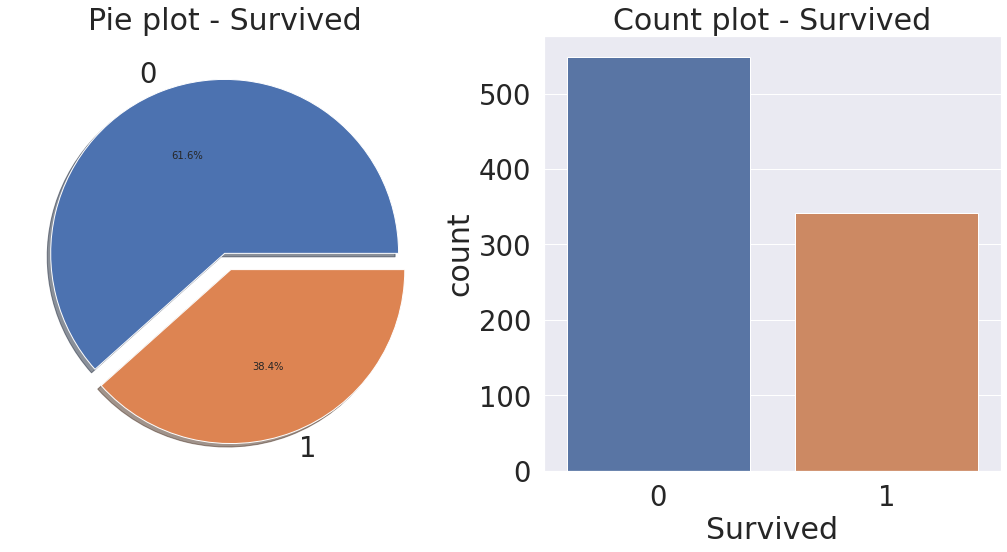

In [56]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

1. 그래프 결과 죽은 사람이 많습니다.
2. 38.4%가 살아남았습니다.
3. target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행합니다.

# 2. Exploratory(탐색) data analysis
1. 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 저걸한 시각화가 필요합니다.
2. 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스 코드를 정리해두어 필요할 때마다 참고하면 편하니다.

# 2.1 Pclass
1. 먼저 Pclass에 대해서 살펴보겠습니다. Pclass는 ordinal, 서수형 데이터입니다.카테고리이면서, 순서가 있는 데이터 타입니다.
2. Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 Pivot 이라는 메소드도 있습니다.
3. 'Pclass', 'Survived' 를 가져온 후, pclass로 묶습니다. 그리고 나면 각 pclass 마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.
4. 아래와 같이 count() 를 하면, 각 class에 몇명이 있는지 확인할 수 있으며, sum() 을 하면, 216명중 생존한(survived=1)사람의 총합을 주게 됩니다.

In [57]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [58]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [59]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


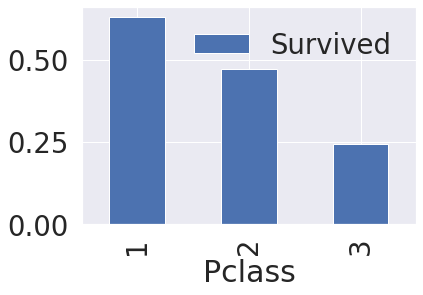

In [60]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

보다시피, Pclass가 좋을수록 생존률이 높은것을 확인할 수 있다.
1. 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn 의 countplot 을 이용하면 특정 label 에 따른 개수를 확인해 볼 수 있다.


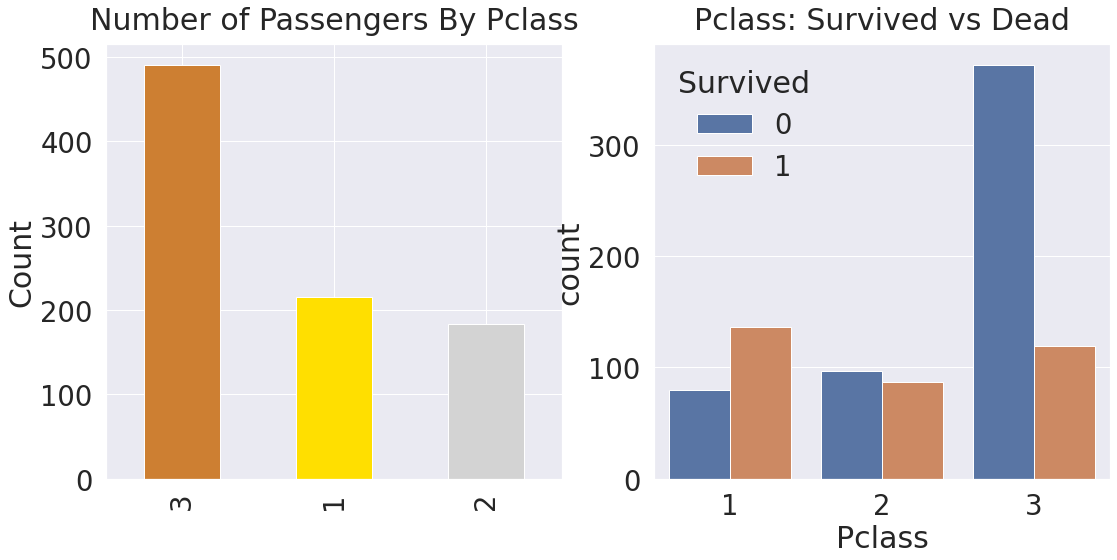

In [61]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

1. 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25%입니다.
2. 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단하였습니다.

# 2.2 Sex
1. 이번에는 성별로 생존률이 어떻게 달라지는지 확인해 보겠습니다.
2. 마찬가지로 pandas groupby와 seaborn countplot 을 사용해서 시각화해봅시다.


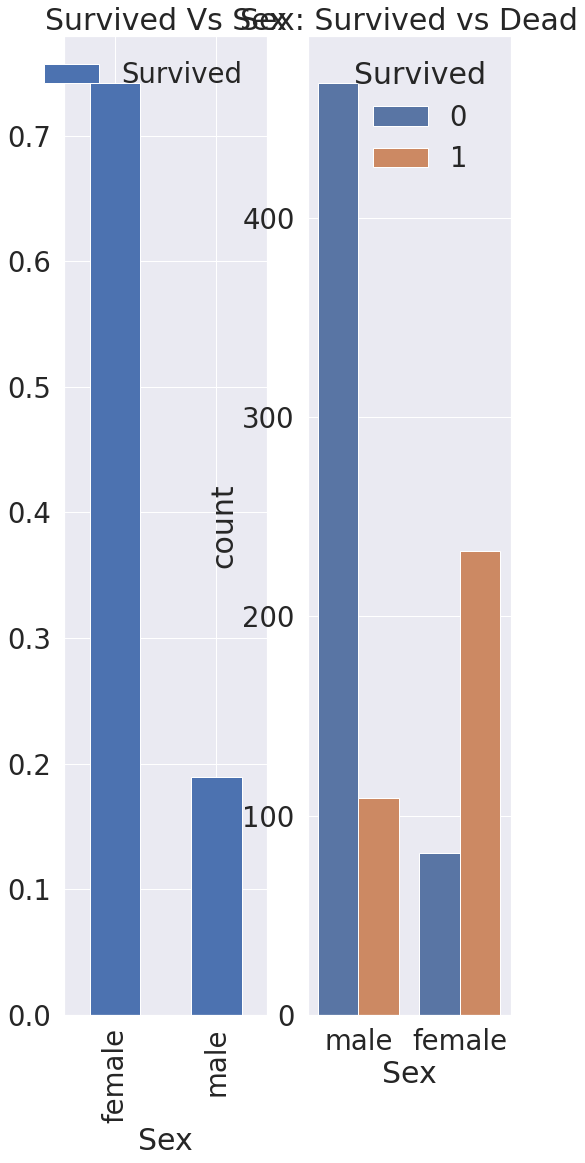

In [62]:
f, ax = plt.subplots(1, 2, figsize=(8,18))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

여자가 생존 확률이 확실히 높다.

In [63]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [64]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Sex도 예측 모델에 쓰일 중요한 feature 임을 확인

# 2.3 Both Sex and Pclass
1. 이번에는 Sex, Pclass두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다.
2. seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

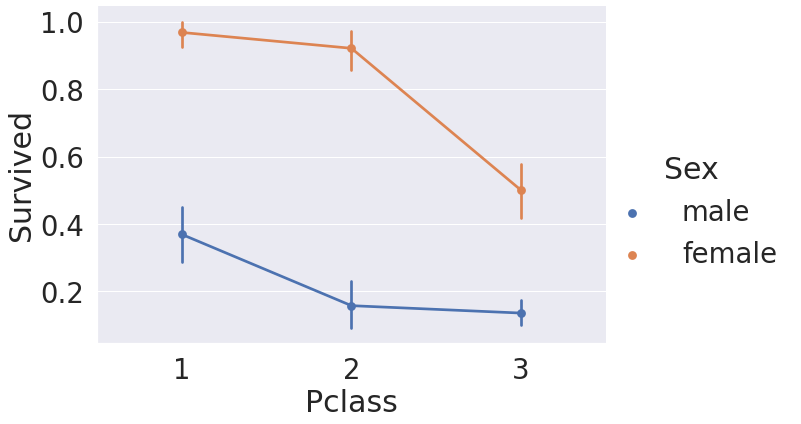

In [65]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size= 6, aspect=1.5)

1. 어떠한 클래스에서 female이 살 확률이 male보다 높은걸 알 수 있다.
2. 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.
3. 위 그래프는 hue 대신 column 으로 하면 아래와 같아질 것이다.

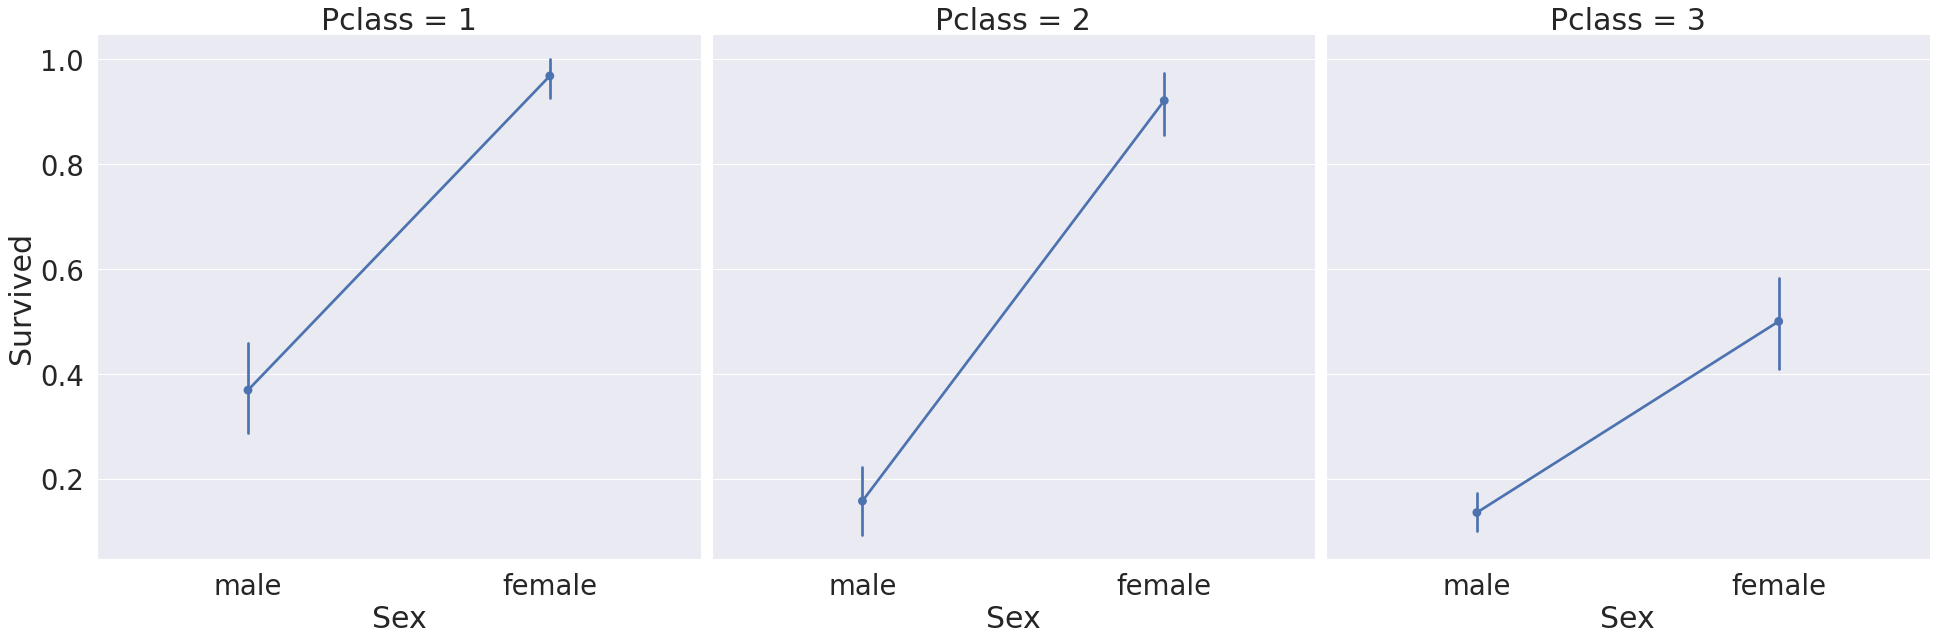

In [66]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, staureation=.5, size=9, aspect=1)

# 2.4 Age
1. 이번에는 Age feature를 살펴봅시다.

In [67]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 적은 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age의 histogram을 그려보겠습니다.

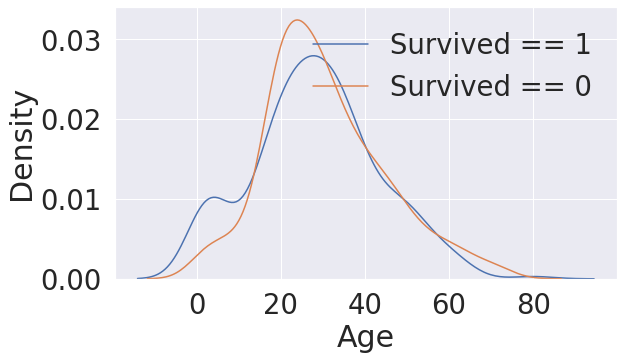

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

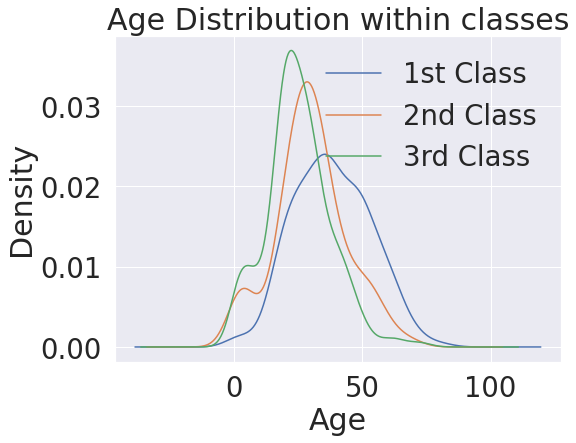

In [69]:
#Age distribution withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

1. Class가 높을수록 나이 많은 사람의 비중이 커짐
2. 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
3. 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

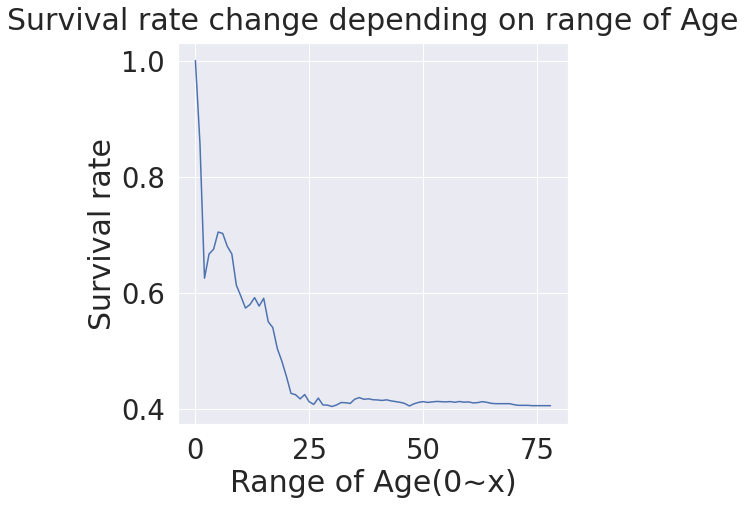

In [70]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

1. 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것 을 확인할수 있습니다.
2. 이것으로 나이가 중요한 feature로 쓰일 수 있음을 확인했습니다.

# Pclass, Sex, Age
1. 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot 입니다.
2. x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)입니다.

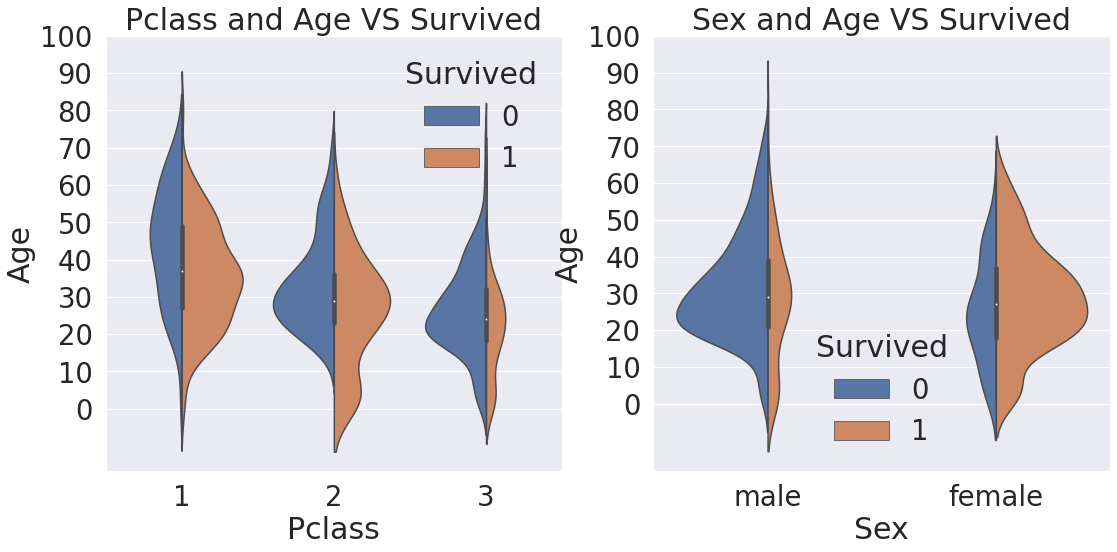

In [71]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. 왼쪽 그림은 Pclass별로 Age의 distribution 이 어떻게 다르지, 거기에 생존여부에 따라 구분한 그래프입니다. 
2. 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다.
3. 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
4. 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

# Embarked
1. Embarked는 탑승한 항구를 나타냅니다.
2. 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠습니다.

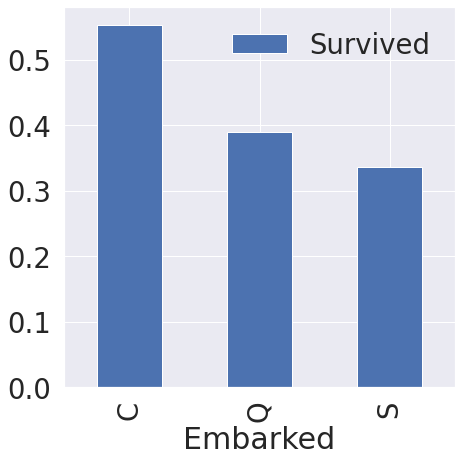

In [72]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

1. 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한거 같습니다. 그래도 C가 제일 높군요.
2. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
3. 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 
4. 다른 feature 로 split하여 한번 살펴보겠습니다.

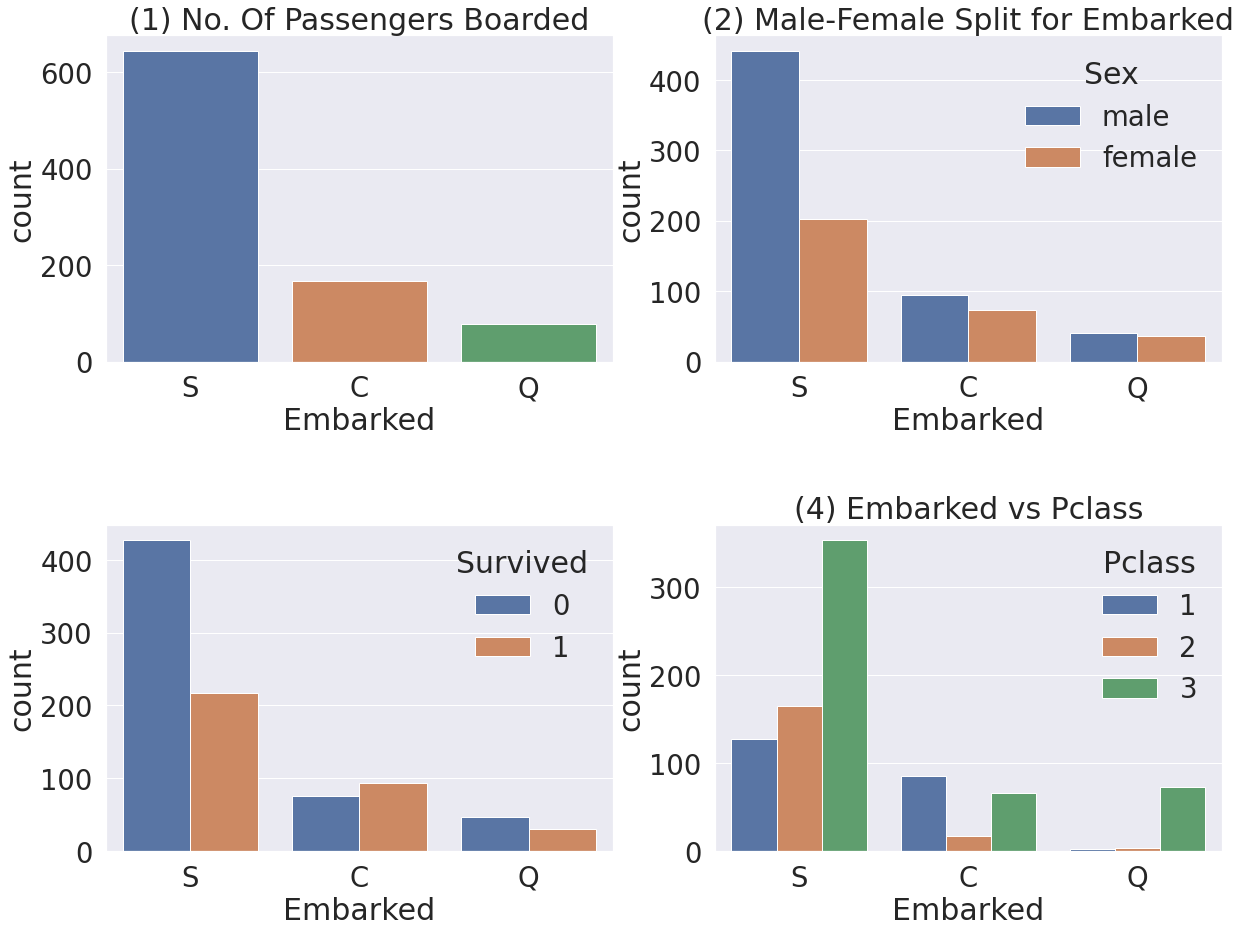

In [73]:
f,ax=plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,1].set_title('(3) Embarked VS Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했습니다.
2. Figure(2) - C와 O는 나면의 비율이 비슷하고 S는 남자가 더 많습니다.
3. Figure(3) - 생존확률이 S겨우 많이 낮은 걸 볼 수 있습니다.
4. Figure(4) - Classfh 로 split해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class가 많아서 생존확률이 낮게 나옵니다.

# 2.7Family -SibSp(형제자매) + Parch(부모 자녀)
1. SisSp와 Parch를 합하면 Family가 될 것입니다. Family로 합쳐서 분석해봅시다.

In [74]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신을 포함해야하니 1을 더합니다.
df_test['FamilySize'] =  df_test['SibSp'] + df_test['Parch'] + 1 #자신을 포합해야하니 1 을 더합니다.

In [75]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


1. FamilySize와 생존의 관계를 한번 살펴 봅시다.

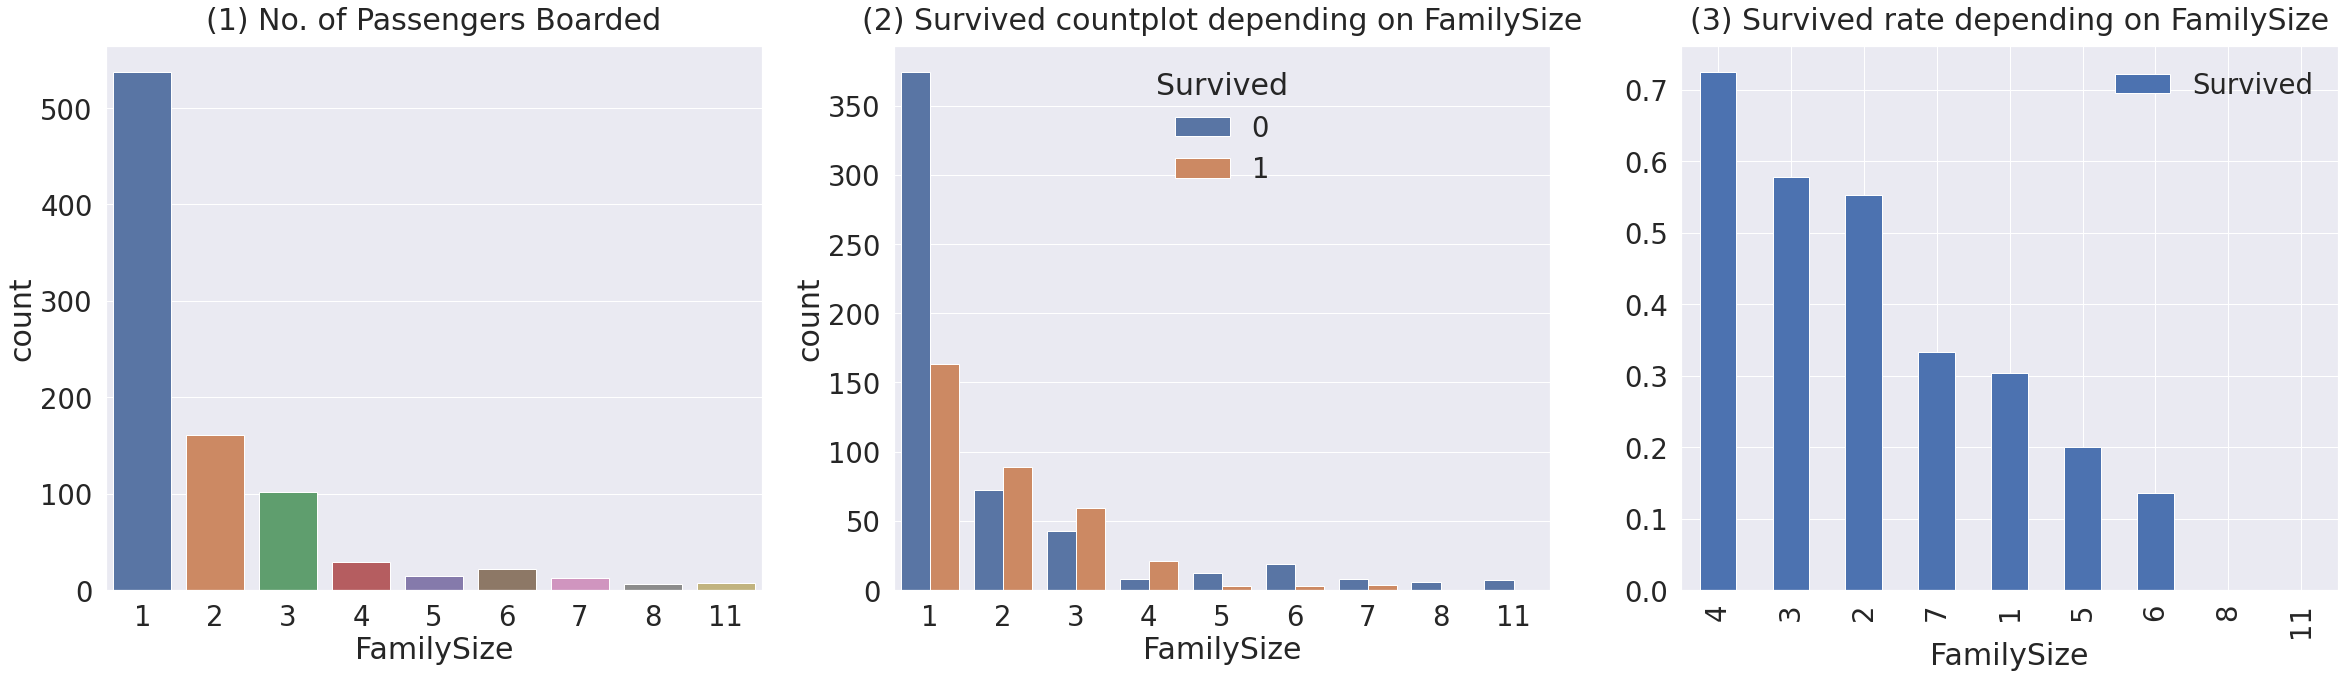

In [76]:
f,ax=plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그다음으로 2,3, 4명입니다.
2. Figure(2) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5,6,7,8,11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5,6,7,8, 11)생존확률이 줄어든다. 3~4명 선에선 생존확률이 높은 걸 확인할 수 있습니다.

# 2.8 Fare
1. Fare는 탑승요금이며, contious feature입니다. 한번 histogram을 그려보겠습니다.

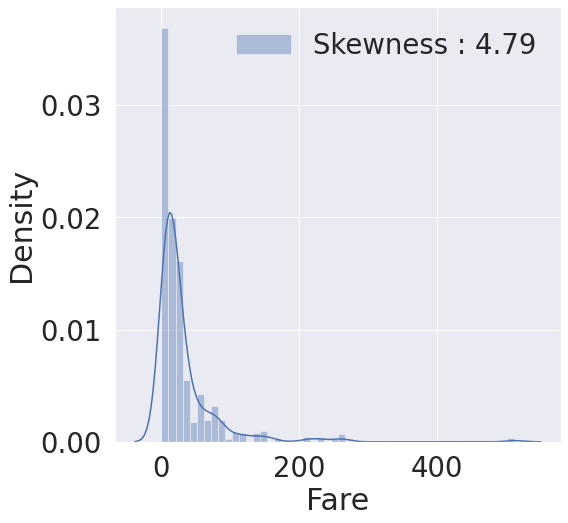

In [77]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

1. 보시다시피, 분포가 매우 비대칭인 것을 알 수 있습니다.(high skewness), 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
2. outlier의 영향을 줄이기 위해 Fare에 log를 취하겠습니다.
3. 여기서 우리는 pandas의 유용한 기능을 사용할 겁니다. dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면  아래의 map or apply를 사용하면 매우 손쉽게 적용할 수 있습니다.
4. 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 맹 유용한 기능이니 꼭 숙지하십시오

In [78]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i> 0 else 0 )

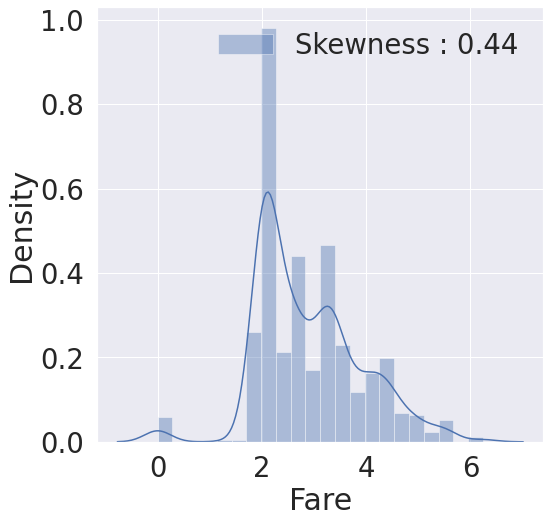

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

1. log를 취하니, 이제 비대칭성이 많이 사라진 것을 볼수 있습니다.
2. 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
3. 사실 방금한 것은 feature engineering에 들어가는 부분인데, 여기서 작업했습니다.
4. 모델을 ㅎ가습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

# 2.9 Cabin
1. 이 feature은 NaN이 대략 80% 이므로, 새옺ㄴ에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
2.그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


# 2.10 Ticket
1. 이 featuresms NaN은 없습니다. 일단 string data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.


In [81]:
df_train['Ticket'].value_counts()


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

1. 보시다시피, ticket number는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?


# 3. 1 Feature engineering
1. 본격적인 feature engineering을 시작해보겠습니다.
2. 가장 먼저, dataset에 존재하는 null data를 채우려고 합니다.
3. 아무 숫자로 채울 수는 없고, null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채울 수 있습니다.
4. null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.
5. Feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로, train뿐만아니라 test도 똑같이 적용해주어야 합니다.

# 3. 1. 1 Fill Null in Age Using title
1. Age에는 null data가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리는 title + statistics를 사용해 보겠습니다.
2. 영어에서는 Miss, Mrr, Mrs같은 타이틀이 존재합니다. 각 탑승객의 이름에는 이런 title이 들어가게 되는데 이를 사용하겠습니다.
3. pandas series에는 data 를 string으로 바꿔주는 strmethod, 거기에 정규표현식을 적용하게 해주는 exxtract method가 있습니다. 이를 사용하여 title을 쉽게 추출할 수있습니다. title을 initial column에 저장하겠습니다.

In [90]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') #Lets extract the solutaions
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.') # Lets extract the salutations

1. pandas의 crossta을 이용하여 우리가 추출한 Initialrhk Sex간의 count를 살펴봅시다.

In [91]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#checking the Initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


1. 위 table을 참고하여, 남자, 여자가 쓰는 initial을 구분해 보겠습니다. replace 메소드를 사용하면 특정 데이터 값을 원하는 값으로 치환해줍니다.

In [93]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'],inplace=True)


In [94]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


1. 여성과 관계있는, Miss, Mr, Mrs가 생존률이 높은 것을 볼 수있습니다.

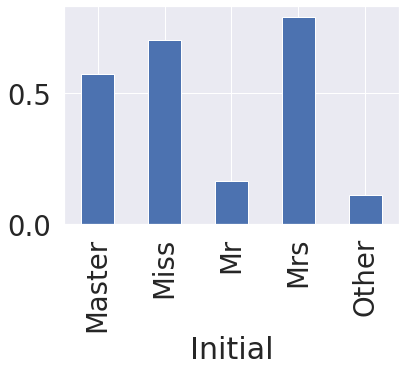

In [95]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

1. 이제 본격적으로 Null값을 채울것입니다. null data를 채우는 방법은 정말 많이 존재합니다. statistics를 활용하는 방법도 있고, null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 잇습니다. 여기서는 statistics를 활용하는 방법으로 사용 할 것입니다.
2. 여기서 statistics는 train data의 것을 의미합니다. 우리는 언제나 test를 unseen으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로 test 의 null data를 채워줘야 합니다.

In [96]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


1. Age의 평균을 이용해 Null value를 채우도록 할게요.
2. pandas dataframe을 다룰 때에는 boolean array를 이용해 indexing 하는 방법이 참으로 편리합니다.
3. 아래 코드 첫줄을 해석하자면, isnull() 이면서 initial 이 Mr인 조건을 만족하는 row(탑승객)의 Age의 값을 33으로 치환한다 입니다.
4. loc + boolean + column 을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해집시다.

In [97]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial =='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial =='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial =='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial =='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial =='Other'), 'Age'] = 46

1. 여기선 간단하게 Null을 채웠지만, 좀 더 다양한 방법을 쓴 예시들이 많다

# 3. 1. 2 Fill Null in Embarked

In [98]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


1. Embarked 는 Null value가 2개이고, S에서 가장 많은 탑승객이 있었으므로, 간단하게 Null을 S로 채우겠습니다.
2. Data Frame의 fillna method를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace=True로 하면 df_train에 fillna를 실제로 적용하게 된다.

In [99]:
df_train['Embarked'].fillna('S', inplace=True)

# 3.2 Change Age(continuous to categorical
1. AgeSMS GUSWO continuous feature입니다. 이대로 써도 모델을 세울 수 있지만, Age를 몇개의 group 으로 나누어 category화 시켜줄 수 있습니다. continuous를 categorical로 바꾸면 자칫 information loss가 생길 수도 있습니다
2. 방법은 여러가지가 있습니다. dataframe의 indexing방법인 loc를 사용하여 직접해줄 수 있고, 아니면 apply를 사용해 함수를 넣어줄 수 있습니다.
3. 첫번째로 loc를 사용한 방법입니다. loc는 자주 쓰게 되므로 그 사용법을 숙지하시면 좋습니다.
4. 나이는 10살 간격으로 나누겠습니다.

In [100]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0 
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] <20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] <30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] <40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] <50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] <60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] <70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0 
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] <20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] <30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] <40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] <50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] <60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] <70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [102]:
def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

1. 두가지 방법이 잘 적용됬다면, 둘다 같은 결과를 내야 합니다.
2. 이를 확인하기 위해 Series간 boolean비교 후 all() 메소드를 사용합니다. all() 메소드는 모든 값이 True면 True 하나라도 False가 있으면 False를 줍니다.

In [103]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> True


In [104]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

# 3.3 Change Initial, Embarked and Sex(string to numerical)

1. 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.
2. map method를 가지고 간단히 할 수 있습니다.
3. 사전 순서대로 정리하여 mapping 하겠습니다.

In [105]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})


1. Embarked도 C, O, S로 이루어져 있습니다. map을 이용해 바꿉시다.
2. 그러기 앞서서, 특정 column에 어떤 값들이 있는지 확인해 보는 방법을 잠깐 살펴보겟습니다. 간단히 unique() 메소드를 쓰거나, value_counts()를 써서 count까지 보는 방법이 있습니다.

In [106]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [107]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

1. 한번 Null이 사라졌는지 확인해봅시다. Embarked Column만 가져온 것은 하나의 pandas의 Series 객체므로, isnull()메소드를 사용해 Series의 값들이 null인지 아닌지에 대한 boolean값을 얻을 수 있습니다. 그리고 이것에 any() 를 사용하여, True가 단 하나라도 있을시(Null이 한개라도 있을시) True를 반환해주게 됩니다. 우리는 Null을 S로 다 바꾸었으므로 False를 얻게 됩니다.

In [109]:
df_train['Embarked'].isnull().any()

False

1. Sex도 map을 이용하여 바꾸어줍시다.

In [110]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

# 마무리 단계
1. 이제 각 feature간의 상관관계를 한번 보려고 합니다. 두 변수간의 Pearson Correlation을 구하면 (-1, 1)사이의 값을 얻을 수 있습니다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다. 구하는 수식은 아래와 같습니다.
2. 우리는 여러 feature를 가지고 있으니 이를 하나의 maxtrix형태로 보면 편할 텐데, 이를 heatmap plot이라고 하며, dataframe의 corr() 메소드와 seaborn을 가지고 편하게 그릴 수 있습니다.

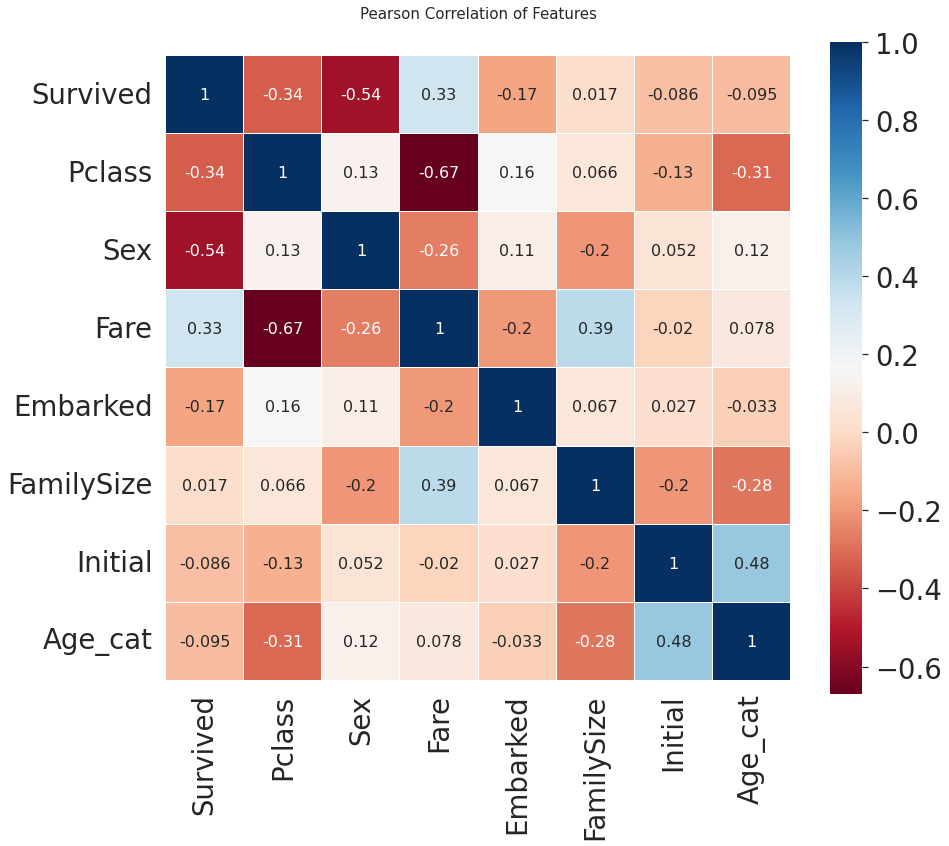

In [111]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

1. 우리가 EDA에서 살펴봤듯이, Sex, pclass가 Survived에 상관관계가 어느 정도 였는지 알 수 있었다.
2. 생각보다 fare와 Embarked도 상관관계가 있음을 볼 수 있다.
3. 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.
4. 이것은 우리가 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature가 없다는 것을 의미합니다. 1 또는 -1 의 상관관계를 가진 feature A, B가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.
5. 이제 실제로 모델을 학습시키기 앞서서 data preprocessing(전처리)을 진행하겠습니다.

# 3.4 One-hot encoding on Initial and Embarked
1. 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
2. 수치화는 간단히 Master ==0, Miss == 1, Mr == 2, Mrs ==3 Other== 4 로 매핑해주는 것을 말합니다.
3. One-hot encoding은 위 카테고리를 아래와 같이 (0, 1)로 이루어진 5차원의 벡터로 나타냅니다.

In [112]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [114]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initital,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,NaN,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,NaN,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,NaN,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,NaN,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,NaN,3,0,0,1,0,0


1. 보시다시피 오른쪽에 우리가 만들려고 했던 one-hot encoded columns가 생성되었습니다.
2. Embarked 에도 적용하겠습니다. Initial 때와 마찬가지로 one-hot encoding을 사용해 표현해봤습니다.

In [115]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

1. one-hot encoding을 적용했습니다.
2. sklearn로 Labelencoder + OneHotencoder 이용해도 one-hot encoding이 가능합니다.

# 3.5 Drop columns
1. 필요한 정보만 살리고 나머지 columns을 지운다.

In [116]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Initital,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,NaN,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,NaN,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,NaN,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,NaN,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,NaN,3,0,0,1,0,0,0,0,1


In [117]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Initital,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,Mr,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,Mrs,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,Mr,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,Mr,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,Mrs,2,0,0,0,1,0,0,0,1


# 4. Building machine learning model and prediction using the trained model
모든 준비가 되었으니 sklearn을 사용하여 머신러닝 모델을 만들어 봅시다.

In [118]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier입니다.
from sklearn import metrics #모델의 평가를 위해서 사용
from sklearn.model_selection import train_test_split #traning set을 쉽게 해주는 함수입니다.

1. Sklearn은 머신러닝의 처음부터 끝까지가 다있습니다. feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즙, 모델 평가, 파이프 라인 등 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있습니다. 데이터 분석 + 머신러닝을 하고 싶으면, 이 라이브러리는 반드시 숙지해야합니다.
2. 파이썬 라이브러리를 활용한 머신러닝(introduction to machine learning with Python)책을 사서 공부하시길 매우 추천해드립니다.
3. 지금 타이타닉 문제는 target class(survived)가 있으며, target class는 0, 1 로 이루어져 있으므로(binary) binary classfication문제 입니다.
4. 우리가 지금 가지고 있는 train set의 survived를 제외한 input을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.
5. 그 후 모델이 학습하지 않았던 test set을 input으로 주어서 test set의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

# 4.1 Preaparation - Split dataset into train, valid, test set
1. 가장 먼저, 학습에 쓰일 데이터와, target label(Survived)를 분리 합니다. drop을 사용하면 간단히 할 수 있습니다.

In [134]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [135]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

1. 보통 train, test만 언급되지만, 실제 좋은 모델을 만들기 위해서 우리는 valid set을 따로 만들어 모델 평가를 해봅시다.
2. 마치 축구대표팀이 팀훈려(train)을 하고 바로 월드컴(test)로 나가는 것이 아니라, 팀훈련(train)을 한 다음 평가전(valid)를 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비븟합니다.
3. train_test_split을 사용하여 쉽게 train셋을 분리할 수 있습니다.

In [136]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

1. 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다. 더 구체적인 모델 설명은 여러 블로그들 참고하시면 됩니다.
2. 각 머신러닝 알고리즘에는 여러 파라미터들이 있습니다. 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf등 여러 파라미터들이 존재합니다. 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.
3. 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다. 결국 많이 써봐야 모델도 잘 세울 수 있는 것이조, 그래서 캐글을 추천합니다. 여러 데이터셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생깁니다.
4. 기본 default세팅으로 진행
5. 모델 객체를 만들고 fit메소드로 학습시킵니다.
6. 그런 후 valid set input을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부를 얻습니다.)

# 4.2 Model generation and prediction

(623, 14)

In [137]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

ValueError: ignored

# kaggle-kr.tistory.com/18#4